<a href="https://colab.research.google.com/github/sunnybhupati/sb-test/blob/master/CNNAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Mounted at /content/gdrive


In [ ]:
!unzip gdrive/MyDrive/data/CNNAssignment/CNN_assignment.zip

In [5]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path('Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [6]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)


2239
118


In [7]:
batch_size = 32
img_height = 180
img_width = 180

In [8]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size= (img_height, img_width),
  batch_size= batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [9]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size= (img_height, img_width),
  batch_size= batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [10]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


In [11]:
val_ds.class_names

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

Visualize the data


In [12]:
import glob
train_image_names = glob.glob("Skin cancer ISIC The International Skin Imaging Collaboration/Train/*/*.jpg")
print("Total number of training images: ", len(train_image_names))
train_image_names = pd.Series(train_image_names)

Total number of training images:  2239


In [13]:
train_image_names


0       Skin cancer ISIC The International Skin Imagin...
1       Skin cancer ISIC The International Skin Imagin...
2       Skin cancer ISIC The International Skin Imagin...
3       Skin cancer ISIC The International Skin Imagin...
4       Skin cancer ISIC The International Skin Imagin...
                              ...                        
2234    Skin cancer ISIC The International Skin Imagin...
2235    Skin cancer ISIC The International Skin Imagin...
2236    Skin cancer ISIC The International Skin Imagin...
2237    Skin cancer ISIC The International Skin Imagin...
2238    Skin cancer ISIC The International Skin Imagin...
Length: 2239, dtype: object

In [14]:
# train_df: a dataframe with 2 field: Filename, ClassId
train_df = pd.DataFrame()

# generate Filename field
train_df['Filename'] = train_image_names.map(lambda img_name: img_name.split("/")[-1])

# # generate ClassId field
train_df['ClassId'] = train_image_names.map(lambda img_name: img_name.split("/")[-2])

train_df.head()

,Filename,ClassId
0,ISIC_0029278.jpg,basal cell carcinoma
1,ISIC_0029201.jpg,basal cell carcinoma
2,ISIC_0029515.jpg,basal cell carcinoma
3,ISIC_0029779.jpg,basal cell carcinoma
4,ISIC_0024848.jpg,basal cell carcinoma


In [15]:
# Converting to display only the unique classes and any of their images.
unique_train_df = train_df.groupby('ClassId').first()

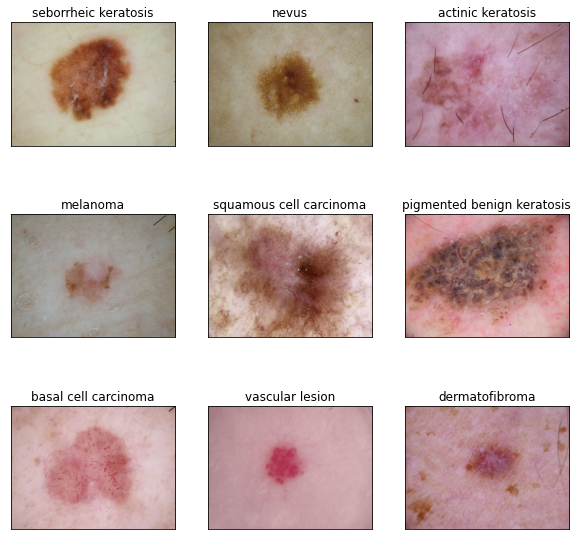

In [16]:
plot_df = unique_train_df.sample(9).reset_index()
plt.figure(figsize=(10, 10))

for i in range(9):
    img_name = plot_df.loc[i, 'Filename']
    label_str = plot_df.loc[i, 'ClassId']
    plt.subplot(3,3,i+1)
    plt.imshow(plt.imread(os.path.join('Skin cancer ISIC The International Skin Imaging Collaboration/Train/',label_str, img_name)))
    plt.title(label_str)
    plt.xticks([])
    plt.yticks([])

In [17]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [18]:
### Your code goes here
num_classes = 9

# https://keras.io/api/layers/preprocessing_layers/image_preprocessing/rescaling/
# https://www.tensorflow.org/api_docs/python/tf/keras/layers/experimental/preprocessing/Rescaling
model = Sequential([
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3)),
                    layers.Conv2D(16,3, padding='same', activation='relu'),
                    layers.MaxPool2D(),
                    layers.Conv2D(32,3, padding='same', activation='relu'),
                    layers.MaxPool2D(),
                    layers.Conv2D(64,3, padding='same', activation='relu'),
                    layers.MaxPool2D(),
                    layers.Flatten(),
                    layers.Dense(128, activation='relu'),
                    layers.Dense(num_classes)
])

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [19]:
# https://datascience.stackexchange.com/questions/73093/what-does-from-logits-true-do-in-sparsecategoricalcrossentropy-loss-function
# https://stackoverflow.com/questions/57253841/from-logits-true-and-from-logits-false-get-different-training-result-for-tf-loss

### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [20]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 64)        0

Train the model

In [21]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 70s 1s/step - loss: 1.9648 - accuracy: 0.2522 - val_loss: 1.7332 - val_accuracy: 0.3691
Epoch 2/20
56/56 [==============================] - 55s 975ms/step - loss: 1.6686 - accuracy: 0.4107 - val_loss: 1.6043 - val_accuracy: 0.4295
Epoch 3/20
56/56 [==============================] - 55s 981ms/step - loss: 1.4573 - accuracy: 0.4872 - val_loss: 1.4936 - val_accuracy: 0.4966
Epoch 4/20
56/56 [==============================] - 55s 975ms/step - loss: 1.3724 - accuracy: 0.5173 - val_loss: 1.4168 - val_accuracy: 0.5034
Epoch 5/20
56/56 [==============================] - 55s 977ms/step - loss: 1.2666 - accuracy: 0.5536 - val_loss: 1.6217 - val_accuracy: 0.4497
Epoch 6/20
56/56 [==============================] - 56s 1s/step - loss: 1.1943 - accuracy: 0.5753 - val_loss: 1.2751 - val_accuracy: 0.5526
Epoch 7/20
56/56 [==============================] - 55s 975ms/step - loss: 1.1121 - accuracy: 0.6049 - val_loss: 1.3638 - val_accuracy: 0.5369
Epoch

Visualizing training results

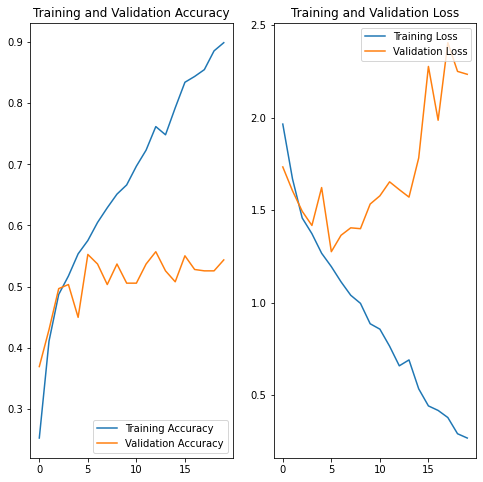

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [23]:
# https://www.tensorflow.org/api_docs/python/tf/keras/layers/experimental/preprocessing/RandomFlip
# https://www.google.com/search?q=data+augmentation&sxsrf=ALeKk01MsPmJXdfhg3b6us4y9teNGfNfXA:1625846206878&source=lnms&tbm=isch&sa=X&ved=2ahUKEwiW6fqMrdbxAhWxW3wKHRK8BIwQ_AUoAXoECAEQAw&biw=1440&bih=821#imgrc=25O0U9iUscIHlM
# Todo, after you have analysed the model fit history for presence of underfit or overfit, 
# choose an appropriate data augumentation strategy. 
data_augmentation = keras.Sequential(
    [
     layers.experimental.preprocessing.RandomFlip("horizontal", input_shape = (img_height, img_width,3)),
     layers.experimental.preprocessing.RandomRotation(0.1),
     layers.experimental.preprocessing.RandomZoom(0.1)
    ]
)

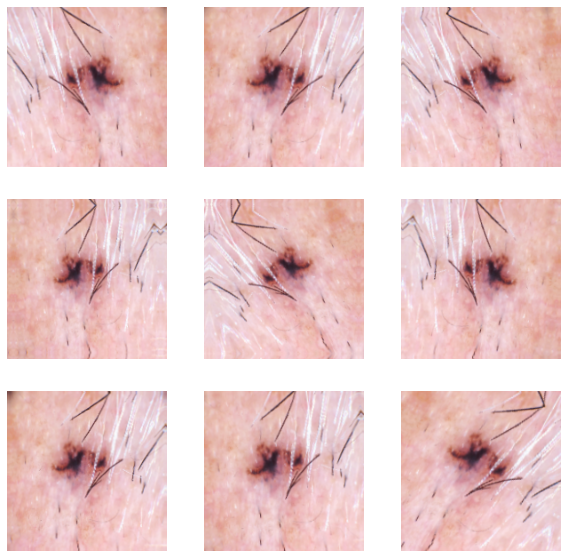

In [24]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here
plt.figure(figsize=(10,10))

for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3,3,i+1)
    plt.imshow(augmented_images[0].numpy().astype('uint8'))
    plt.axis("off");

In [25]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here
model = Sequential([
                    data_augmentation,
                    layers.experimental.preprocessing.Rescaling(1./255),
                    layers.Conv2D(16,3, padding='same', activation='relu'),
                    layers.MaxPool2D(),
                    layers.Conv2D(32,3, padding='same', activation='relu'),
                    layers.MaxPool2D(),
                    layers.Conv2D(64,3, padding='same', activation='relu'),
                    layers.MaxPool2D(),
                    layers.Dropout(0.2),
                    layers.Flatten(),
                    layers.Dense(128, activation='relu'),
                    layers.Dense(num_classes)
])

In [26]:
# https://datascience.stackexchange.com/questions/73093/what-does-from-logits-true-do-in-sparsecategoricalcrossentropy-loss-function
# https://stackoverflow.com/questions/57253841/from-logits-true-and-from-logits-false-get-different-training-result-for-tf-loss

### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [27]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 64s 1s/step - loss: 1.9803 - accuracy: 0.2662 - val_loss: 1.7984 - val_accuracy: 0.3624
Epoch 2/20
56/56 [==============================] - 63s 1s/step - loss: 1.7110 - accuracy: 0.3689 - val_loss: 1.5450 - val_accuracy: 0.4541
Epoch 3/20
56/56 [==============================] - 63s 1s/step - loss: 1.4514 - accuracy: 0.4833 - val_loss: 1.4775 - val_accuracy: 0.5011
Epoch 4/20
56/56 [==============================] - 63s 1s/step - loss: 1.3964 - accuracy: 0.5050 - val_loss: 1.3917 - val_accuracy: 0.5235
Epoch 5/20
56/56 [==============================] - 63s 1s/step - loss: 1.3250 - accuracy: 0.5195 - val_loss: 1.3921 - val_accuracy: 0.5302
Epoch 6/20
56/56 [==============================] - 63s 1s/step - loss: 1.2917 - accuracy: 0.5502 - val_loss: 1.3696 - val_accuracy: 0.5369
Epoch 7/20
56/56 [==============================] - 63s 1s/step - loss: 1.2811 - accuracy: 0.5463 - val_loss: 1.3746 - val_accuracy: 0.5369
Epoch 8/20
56/56 [==

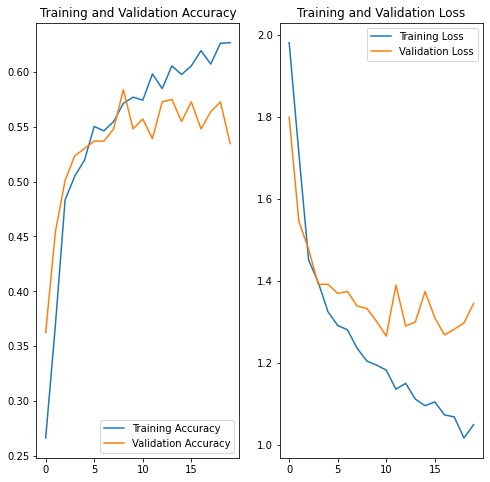

In [28]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
## Your code goes here.

from glob import  glob
path_list = [ x for x in glob(os.path.join(data_dir_train, "*", "*.jpg")) ]
path_list

In [32]:
lesion_list = [ os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train, "*", "*.jpg")) ]
lesion_list

['basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',


In [33]:
dataframe_dict_original = dict(zip(path_list, lesion_list))
dataframe_dict_original

{'Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/ISIC_0029278.jpg': 'basal cell carcinoma',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/ISIC_0029201.jpg': 'basal cell carcinoma',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/ISIC_0029515.jpg': 'basal cell carcinoma',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/ISIC_0029779.jpg': 'basal cell carcinoma',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/ISIC_0024848.jpg': 'basal cell carcinoma',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/ISIC_0024665.jpg': 'basal cell carcinoma',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/ISIC_0024931.jpg': 'basal cell carcinoma',
 'Skin cancer ISIC The International Skin Imaging Collaboratio

In [34]:
original_df = pd.DataFrame(list(dataframe_dict_original.items()), columns= ['Path', 'Label'])
original_df.shape

(2239, 2)

In [35]:
original_df.head()

,Path,Label
0,Skin cancer ISIC The International Skin Imagin...,basal cell carcinoma
1,Skin cancer ISIC The International Skin Imagin...,basal cell carcinoma
2,Skin cancer ISIC The International Skin Imagin...,basal cell carcinoma
3,Skin cancer ISIC The International Skin Imagin...,basal cell carcinoma
4,Skin cancer ISIC The International Skin Imagin...,basal cell carcinoma


In [40]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2239 entries, 0 to 2238
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Path    2239 non-null   object
 1   Label   2239 non-null   object
dtypes: object(2)
memory usage: 35.1+ KB


In [44]:
bridge_df = original_df.copy()

In [50]:
# converting type of columns to 'category'
bridge_df['Label'] = bridge_df['Label'].astype('category')

In [49]:
bridge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2239 entries, 0 to 2238
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Path    2239 non-null   object
 1   Label   2239 non-null   int8  
dtypes: int8(1), object(1)
memory usage: 19.8+ KB


In [57]:
bridge_df.head(10)

,Path,Label
0,Skin cancer ISIC The International Skin Imagin...,1
1,Skin cancer ISIC The International Skin Imagin...,1
2,Skin cancer ISIC The International Skin Imagin...,1
3,Skin cancer ISIC The International Skin Imagin...,1
4,Skin cancer ISIC The International Skin Imagin...,1
5,Skin cancer ISIC The International Skin Imagin...,1
6,Skin cancer ISIC The International Skin Imagin...,1
7,Skin cancer ISIC The International Skin Imagin...,1
8,Skin cancer ISIC The International Skin Imagin...,1
9,Skin cancer ISIC The International Skin Imagin...,1


In [59]:
bridge_df1 = original_df.copy()

In [61]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
bridge_df1['Label'] = labelencoder.fit_transform(bridge_df1['Label'])
bridge_df1.head()

,Path,Label
0,Skin cancer ISIC The International Skin Imagin...,1
1,Skin cancer ISIC The International Skin Imagin...,1
2,Skin cancer ISIC The International Skin Imagin...,1
3,Skin cancer ISIC The International Skin Imagin...,1
4,Skin cancer ISIC The International Skin Imagin...,1


In [62]:
unique_bridge_df1 = bridge_df1.groupby('Label').first()

In [64]:
pd.set_option('display.max_colwidth', None)

In [65]:
unique_bridge_df1.head(10)

,Path
Label,
0,Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/ISIC_0031292.jpg
1,Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/ISIC_0029278.jpg
2,Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/ISIC_0026313.jpg
3,Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/ISIC_0010514.jpg
4,Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/ISIC_0000421.jpg
5,Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/ISIC_0028354.jpg
6,Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/ISIC_0010860.jpg
7,Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/ISIC_0028381.jpg
8,Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/ISIC_0032715.jpg


In [66]:
!pip install Augmentor

In [67]:
class_names

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

In [68]:
path_to_training_dataset="Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 114 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F5D58B99650>: 100%|██████████| 500/500 [00:19<00:00, 25.34 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 376 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F5D5CCB5CD0>: 100%|██████████| 500/500 [00:18<00:00, 26.64 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 95 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F5D6CFC8090>: 100%|██████████| 500/500 [00:19<00:00, 25.22 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 438 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F5D5D1AC3D0>: 100%|██████████| 500/500 [01:49<00:00,  4.58 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 357 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=767x576 at 0x7F5DC02066D0>: 100%|██████████| 500/500 [01:31<00:00,  5.45 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 462 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F5D688D9850>: 100%|██████████| 500/500 [00:19<00:00, 25.84 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 77 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F5D688B5F90>: 100%|██████████| 500/500 [00:45<00:00, 10.89 Samples/s]
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F5D688D9E90>:   0%|          | 1/500 [00:00<01:09,  7.17 Samples/s]

Initialised with 181 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F5D6D5A5C90>: 100%|██████████| 500/500 [00:19<00:00, 25.48 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 139 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F5D688F97D0>: 100%|██████████| 500/500 [00:19<00:00, 25.43 Samples/s]


In [69]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


In [70]:
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list_new

['Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output/basal cell carcinoma_original_ISIC_0030314.jpg_e6f743bc-19e6-46ee-9308-8836b36601cb.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output/basal cell carcinoma_original_ISIC_0028765.jpg_82da2f86-e987-4556-a38c-6a8502c5e6d6.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output/basal cell carcinoma_original_ISIC_0028106.jpg_68def606-7d3f-4787-ad1b-5f71ed44865d.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output/basal cell carcinoma_original_ISIC_0027601.jpg_0b7ccdb2-fc8b-4ecb-a67b-d5ff4c729065.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output/basal cell carcinoma_original_ISIC_0029680.jpg_fa10225f-e565-4b1c-86c5-f4ed52ea4c6c.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaborat

In [71]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',


In [72]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [73]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

In [74]:
new_df['Label'].value_counts()

pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: Label, dtype: int64

In [75]:
batch_size = 32
img_height = 180
img_width = 180

In [84]:
data_dir_train

PosixPath('Skin cancer ISIC The International Skin Imaging Collaboration/Train')

In [76]:
# data_dir_train="path to directory with training data + data created using augmentor"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


In [81]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',## Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [85]:
### Your code goes here
num_classes = 9

# https://keras.io/api/layers/preprocessing_layers/image_preprocessing/rescaling/
# https://www.tensorflow.org/api_docs/python/tf/keras/layers/experimental/preprocessing/Rescaling
model = Sequential([
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3)),
                    layers.Conv2D(16,3, padding='same', activation='relu'),
                    layers.MaxPool2D(),
                    layers.Conv2D(32,3, padding='same', activation='relu'),
                    layers.MaxPool2D(),
                    layers.Conv2D(64,3, padding='same', activation='relu'),
                    layers.MaxPool2D(),
                    layers.Flatten(),
                    layers.Dense(128, activation='relu'),
                    layers.Dense(num_classes)
])

In [86]:
# https://datascience.stackexchange.com/questions/73093/what-does-from-logits-true-do-in-sparsecategoricalcrossentropy-loss-function
# https://stackoverflow.com/questions/57253841/from-logits-true-and-from-logits-false-get-different-training-result-for-tf-loss

### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
 47/169 [=======>......................] - ETA: 2:05 - loss: 2.4839 - accuracy: 0.1336

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()